### As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

- The first step will be to acquire and prep the data. Do your work for this exercise in a file named `wrangle.py`.

1. Acquire `customer_id`, `monthly_charges`, `tenure`, and `total_charges` from `telco_churn` database for all customers with a 2 year contract.

2. Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate.
 
3. End with a python file `wrangle.py` that contains the function, `wrangle_telco()`, that will acquire the data and return a dataframe cleaned with no missing values.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
from sklearn.model_selection import train_test_split

import wrangle

In [2]:
df = wrangle.get_telco_data()

In [3]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [4]:
df.shape

(1695, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [6]:
df.total_charges = pd.to_numeric(df.total_charges, errors='coerce').astype('float64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1685 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


In [8]:
df.isnull().value_counts()

customer_id  monthly_charges  tenure  total_charges
False        False            False   False            1685
                                      True               10
dtype: int64

In [9]:
df.fillna(0)

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75
...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40
1691,9972-EWRJS,19.25,67,1372.90
1692,9975-GPKZU,19.75,46,856.50
1693,9993-LHIEB,67.85,67,4627.65


In [10]:
df.isnull().value_counts()

customer_id  monthly_charges  tenure  total_charges
False        False            False   False            1685
                                      True               10
dtype: int64

In [11]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [12]:
rows_with_NaN

,customer_id,monthly_charges,tenure,total_charges
234,1371-DWPAZ,56.05,0,NaN
416,2520-SGTTA,20.00,0,NaN
453,2775-SEFEE,61.90,0,NaN
505,3115-CZMZD,20.25,0,NaN
524,3213-VVOLG,25.35,0,NaN
678,4075-WKNIU,73.35,0,NaN
716,4367-NUYAO,25.75,0,NaN
726,4472-LVYGI,52.55,0,NaN
941,5709-LVOEQ,80.85,0,NaN
1293,7644-OMVMY,19.85,0,NaN


In [9]:
df = df.fillna(0)

In [10]:
df.isnull().value_counts()

customer_id  monthly_charges  tenure  total_charges
False        False            False   False            1695
dtype: int64

In [11]:
df.isna().value_counts()

customer_id  monthly_charges  tenure  total_charges
False        False            False   False            1695
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


In [16]:
df = df.drop(columns='customer_id')

In [17]:
df.head()

,monthly_charges,tenure,total_charges
0,109.70,71,7904.25
1,84.65,63,5377.80
2,90.45,65,5957.90
3,45.20,54,2460.55
4,116.80,72,8456.75


In [18]:
for i, val in enumerate(list(df.columns)):
    print(i)
    print(val)

0
monthly_charges
1
tenure
2
total_charges


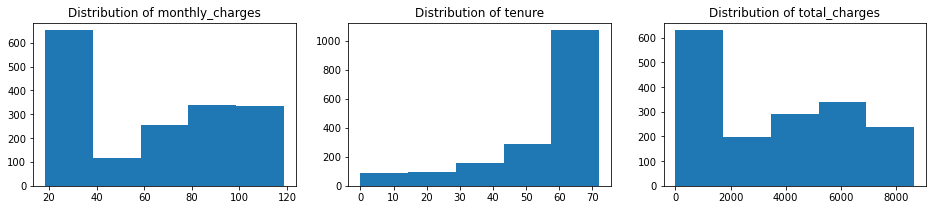

In [19]:
plt.figure(figsize=(16, 3))
for i, val in enumerate(list(df.columns)):
    plotnum = i + 1
    plt.subplot(1,3,plotnum)
    plt.title(f'Distribution of {val}')
    plt.hist(df[val], bins=5)

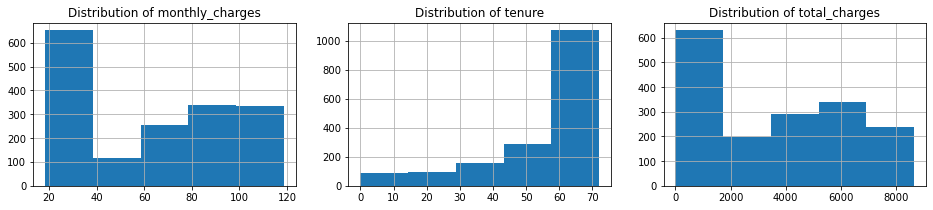

In [20]:
plt.figure(figsize=(16, 3))
for i, val in enumerate(list(df.columns)):
    plotnum = i + 1
    plt.subplot(1,3,plotnum)
    plt.title(f'Distribution of {val}')
    df[val].hist(bins=5)

<AxesSubplot:>

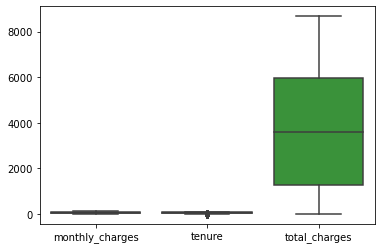

In [21]:
# boxplot
sns.boxplot(data=df)

<AxesSubplot:>

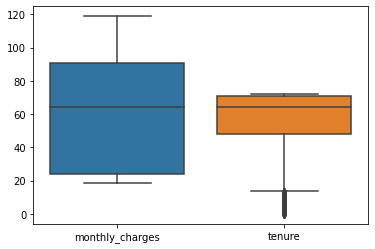

In [23]:
# boxplot
sns.boxplot(data=df.drop(columns=['total_charges']))

<AxesSubplot:>

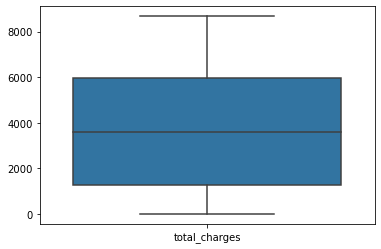

In [24]:
sns.boxplot(data=df[['total_charges']])

In [19]:
train_validate, test = train_test_split(df, test_size=0.2, random_state=3210)

In [20]:
train, validate = train_test_split(train_validate, train_size=0.7, random_state=3210)

In [21]:
train, validate, test

(      monthly_charges  tenure  total_charges
 1066            81.00      62        4985.90
 736             19.35      12         212.30
 533            116.60      72        8337.45
 398            114.85      72        8317.95
 1495           110.65      72        8065.65
 ...               ...     ...            ...
 119             75.50      70        5212.65
 1343            19.60      21         397.00
 256             96.25      52        4990.25
 875            111.65      72        8022.85
 138             99.00      42        4135.00
 
 [949 rows x 3 columns],
       monthly_charges  tenure  total_charges
 863             20.35      45         929.20
 1194            83.70      72        6096.90
 14              85.15      72        6316.20
 1475            19.85      59        1188.25
 17              88.10      61        5526.75
 ...               ...     ...            ...
 337             78.95      72        5730.15
 534            106.00      71        7723.70
 836   

## Testing the final function from `wrangle.py`

In [2]:
train, validate, test = wrangle.wrangle_telco()

In [3]:
train.shape, validate.shape, test.shape

((949, 4), (407, 4), (339, 4))